**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Soner Yıldırım, Bex T, Manuel Hupperich, Youssef Hosni and Piero Paialunga en www.towardsdatascience.com. Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# Time Series Analysis
Time series is a sequence of values ordered in time. In this post, we will create time series data with different patterns. One advantage of synthetic datasets is that we can measure the performance of a model and have an idea about how it will perform with real life data. 
The common patterns observed in a time series are:

* **Trend**: An overall upward or downward direction.
* **Seasonality**: Patterns that repeat observed or predictable intervals.
* **White noise**: Time series does not always follow a pattern or include seasonality. Some processes produce just random data.


## Working with Time Series in Pandas

The basic building block of creating a time series data in python using Pandas time stamp (pd.Timestamp) which is shown in the example below:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
import pandas as pd 
from datetime import datetime # To manually create dates
time_stamp = pd.Timestamp(datetime(2017, 1, 1))
time_stamp.year

2017

In [3]:

index = pd.date_range(start='2017-1-1', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

## Creating Synthetic Datasets

In [190]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def plot_time_series(time, values, label):
    plt.figure(figsize=(10,6))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

## Trend in Time Series
Does the data represent a general upward or downward slope?

A stationary time series is a time series whose statistical properties such as mean and standard deviation does not depend on time. Stationery is a very important concept in time series analysis and forecasting. The reason for this is that if the series is not stationary we would not be able to model and forecast it. The main task of the modeling step is estimating a set of parameters that could be used for the required tasks such as forecasting. If the series is non-stationary, its parameters will be changing over time so you will not be able to model it. For a time series to be stationary it must fulfill three criteria:

* The series has zero trends. It isn’t growing or shrinking.
* The variance is constant. The average distance of the data points from the zero line isn’t changing.
* The autocorrelation is constant. How each value in the time series is related to its neighbors stays the same.

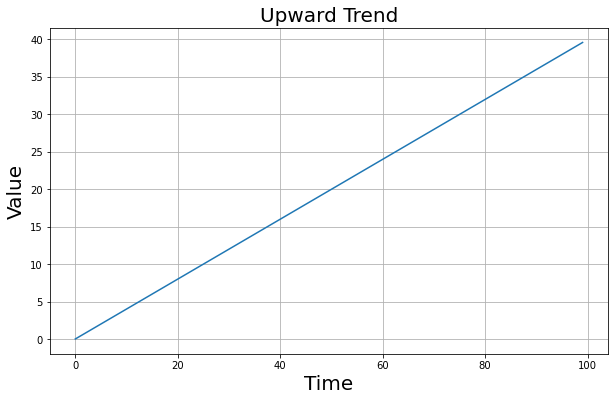

In [61]:
time = np.arange(100)
values = time*0.4
plot_time_series(time, values, "Upward Trend")

## Seasonality in Time Series
Does the data have a clear cyclical/periodic pattern?

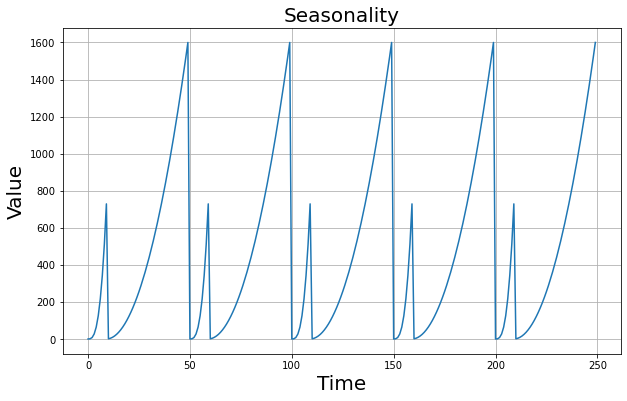

In [62]:
# Just a random pattern
time = np.arange(50)
values = np.where(time < 10, time**3, (time-9)**2)
# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(50):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality")

## Noise

What are the outliers or missing values that are not consistent with the rest of the data?

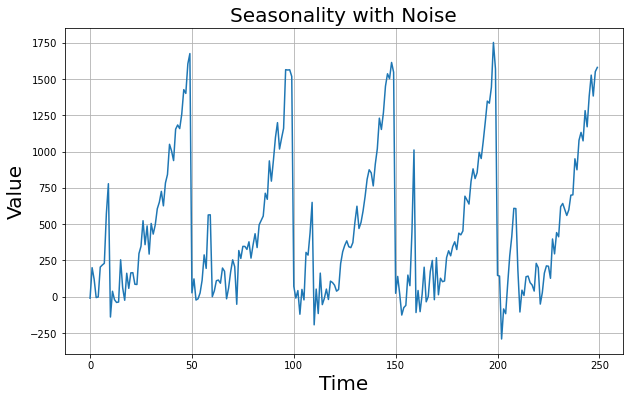

In [63]:
noise = np.random.randn(250)*100
seasonal += noise
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")

## Multiple patterns

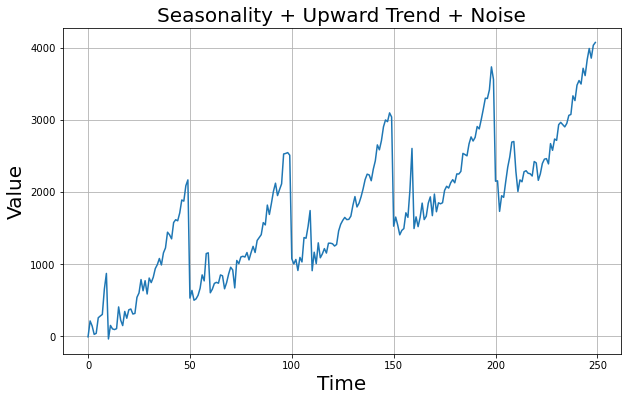

In [64]:
seasonal_upward = seasonal + np.arange(250)*10
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal_upward, label="Seasonality + Upward Trend + Noise")

### Decomposition of Time Series

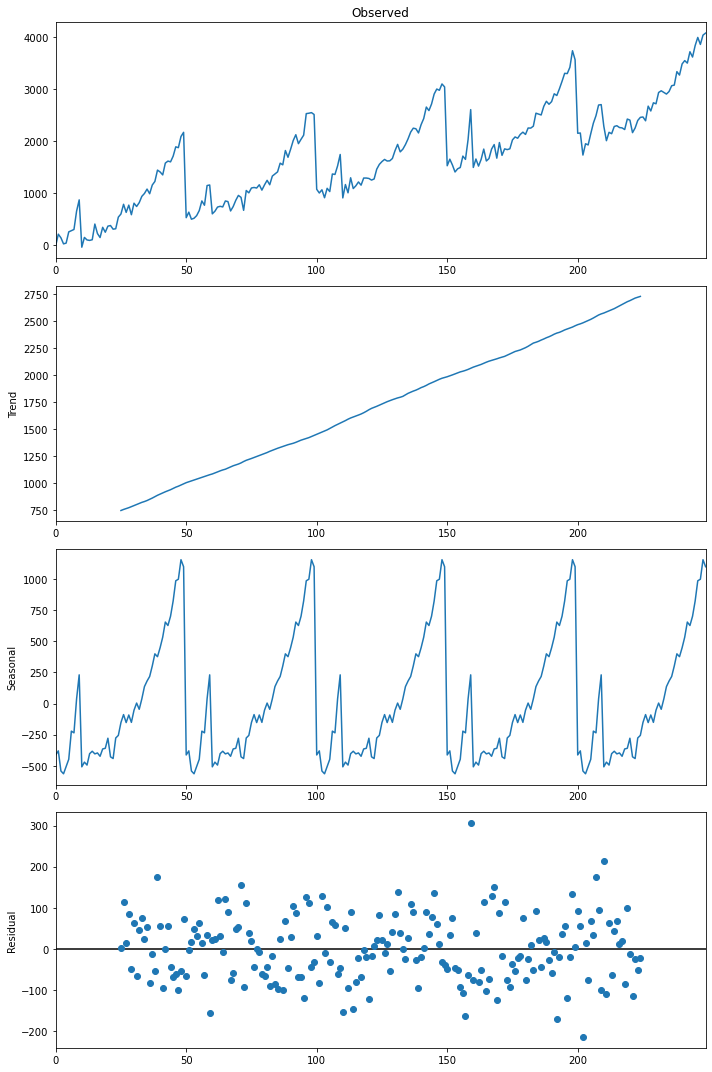

In [65]:
# Import
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose data
decomposition = seasonal_decompose(seasonal_upward, period=50)

# Plot decomposed data
plt.rcParams["figure.figsize"] = (10,15)
decomposition.plot()
plt.show()

## Time series

In [4]:
google = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/google.csv') # import pandas as pd
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [6]:
google.Date = pd.to_datetime(google.Date)
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


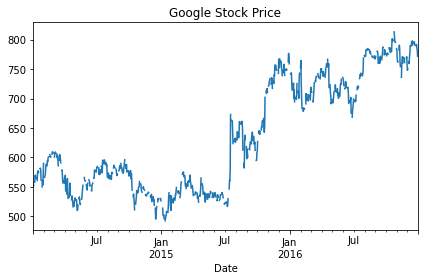

In [9]:
google.Close.plot(title='Google Stock Price')
plt.tight_layout(); plt.show()

The example below shows converting DateTimeIndex of the google stock data into calendar day frequency. The number of instances has increased to 756 due to this daily sampling. The code below prints the first five rows of the daily resampled data:

In [10]:
google.asfreq('D').info() # set calendar day frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [11]:
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [13]:
google = google.asfreq('B') # Change to calendar day frequency only the working day's data.
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


### Lags, changes, and returns for stock price series

In [14]:
google['shifted'] = google.Close.shift() # default: periods=1
google.head(3)

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-06,558.10,551.95


In [16]:
google['lagged'] = google.Close.shift(periods=-1)
google

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,558.10
2014-01-06,558.10,551.95,568.86
2014-01-07,568.86,558.10,570.04
2014-01-08,570.04,568.86,564.55
...,...,...,...
2016-12-26,NaN,789.91,791.55
2016-12-27,791.55,NaN,785.05
2016-12-28,785.05,791.55,782.79


### Resampling

In [17]:
# Creating Quarterly data
dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [18]:
monthly = quarterly.asfreq('M') # to month-end frequency
monthly = monthly.to_frame('baseline') # to DataFrame
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


In [19]:
# Differnet Upsampling fill methods
monthly['ffill'] = quarterly.asfreq('M', method='ffill') # bfill back fill
monthly['bfill'] = quarterly.asfreq('M', method='bfill') # ffill : forward fill
monthly['value'] = quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


In [20]:
# using reindex 
dates = pd.date_range(start='2016', periods=12, freq='M')
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

### Upsampling & interpolation

In [21]:
unrate = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/monthly%20unemployment%20rate.csv', parse_dates=['DATE'], index_col='DATE')
unrate.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


So let's resample it by the starting of each calendar month using both dot-resample and dot-asfreq methods. Both of the methods are the same. When looking at resampling by month, we have so far focused on month-end frequency. In other words, after resampling, new data will be assigned the last calendar day for each month.

In [22]:
unrate.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [23]:
unrate.resample('MS') # creates Resampler object
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

In [50]:
# Upload the GDP growth
ozone = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [26]:
ozone = ozone.resample('D').asfreq()
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


In [27]:
ozone.resample('M').mean().head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [28]:
ozone.resample('M').median().head()

,Ozone
date,
2000-01-31,0.009486
2000-02-29,0.010726
2000-03-31,0.017004
2000-04-30,0.019866
2000-05-31,0.026018


In [29]:
ozone.resample('M').agg(['mean', 'std']).head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

<AxesSubplot:xlabel='date'>

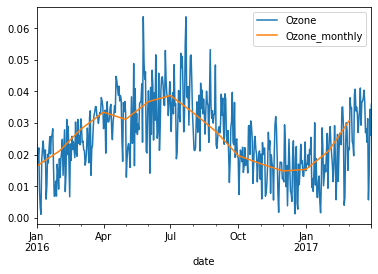

In [30]:
ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

In [32]:
# Integer-based window size
ozone.rolling(window=30, min_periods=1).mean() # fixed # observations

,Ozone
date,
2016-01-01,0.023206
2016-01-02,0.020030
2016-01-03,0.019516
2016-01-04,0.020166
2016-01-05,0.017789
...,...
2017-03-27,0.030317
2017-03-28,0.029861
2017-03-29,0.030507


In [35]:
# Offset-based window size
ozone.rolling(window='30D').mean() # fixed period length

,Ozone
date,
2016-01-01,0.023206
2016-01-02,0.020030
2016-01-03,0.019516
2016-01-04,0.020166
2016-01-05,0.017789
...,...
2017-03-27,0.030317
2017-03-28,0.029861
2017-03-29,0.030507


<AxesSubplot:xlabel='date'>

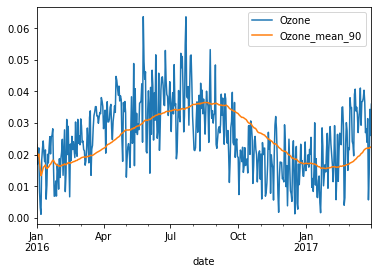

In [34]:

r90 = ozone.rolling(window='90D').mean()
ozone.join(r90.add_suffix('_mean_90')).plot()

In [45]:
# Compute correlation of levels
# data used is levels
levels = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/DJI.csv', parse_dates=['Date'], index_col='Date')

correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9204594155244163
Correlation of changes:  0.009287288259357323


## Regresión Lineal

In [42]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y

data = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/DJI.csv', parse_dates=['Date'], index_col='Date')
data = data.dropna()
x = data['DJI']
y = data['UFO']

correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x.values, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y.values, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is 0.92
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     393.8
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           1.10e-30
Time:                        20:35:46   Log-Likelihood:                -581.51
No. Observations:                  73   AIC:                             1167.
Df Residuals:                      71   BIC:                             1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

## Autocorrelation function

[ 1.          0.91411078  0.8580497   0.81185532  0.7650129   0.72372083
  0.71450091  0.65260766  0.58709504  0.5302116   0.47715226  0.42075641
  0.38687197  0.3382531   0.28298325  0.21055036  0.15394269  0.10348142
  0.06271283  0.0289363   0.00771953 -0.01438766 -0.03482447 -0.0540831
 -0.06830992 -0.0865379  -0.09983334 -0.11043262 -0.12269002 -0.13357531
 -0.14087623 -0.14886629 -0.15633921 -0.16218662 -0.16884145 -0.17523217
 -0.18173045 -0.18851659 -0.19679565 -0.2042776  -0.20959704]


c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


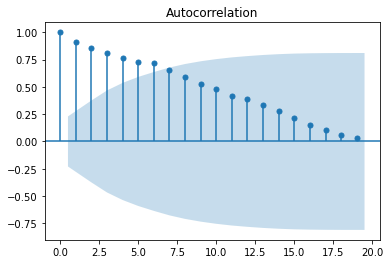

In [56]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

HRB = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/DJI.csv', parse_dates=['Date'], index_col='Date')

# Compute the acf array of HRB
acf_array = acf(HRB.DJI)
print(acf_array)

# Plot the acf function
plot_acf(HRB.DJI, alpha=0.05)
plt.show()

## Stationary series

### Dickey -Fuller test
ADF (Augmented Dickey-Fuller) test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative hypotheses. As a result, we will have a p-value from which we will need to make inferences about the time series, whether it is stationary or not.

In [58]:
from statsmodels.tsa.stattools import adfuller
HRB = HRB.dropna()
SPX = HRB['DJI']
results = adfuller(SPX)
print(results[1]) # print the p-value 

0.998289012539757


The p-value is 0.9 which means that the difference is not significant and we cannot reject the null hypothesis therefore the DJI time series follows a random walk.

Text(0.5, 1.0, 'Quarterly earnings for H&R Block seasonal difference')

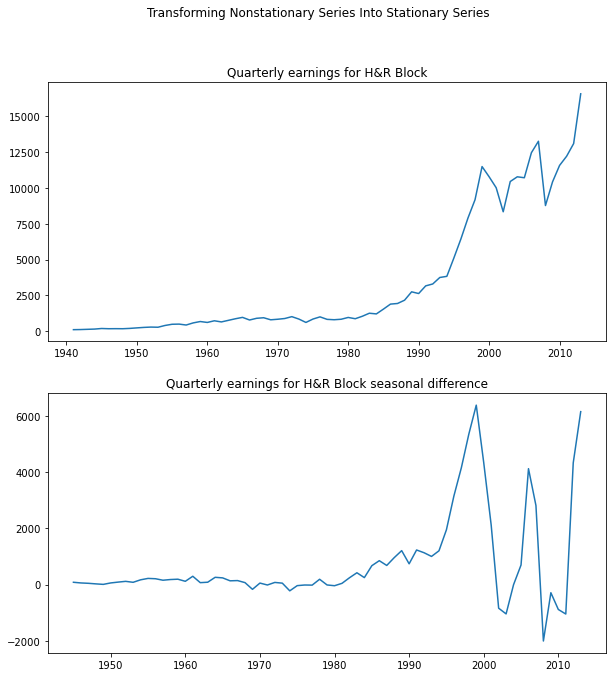

In [59]:
# Transforming Nonstationary Series Into Stationary Series
fig, axs = plt.subplots(2)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(HRB.DJI)
axs[0].set_title('Quarterly earnings for H&R Block')

axs[1].plot(HRB.DJI.diff(4))
axs[1].set_title('Quarterly earnings for H&R Block seasonal difference')

The last example is Amazon's quarterly revenue. It is growing exponentially as well as exhibiting a strong seasonal pattern. First, We will take only the log of the series to eliminate the exponential growth. But if you take both the log of the series and then the seasonal difference, the transformed series looks stationary.

Text(0.5, 1.0, 'Seasonal differnce of Amazon quarterly revenue log')

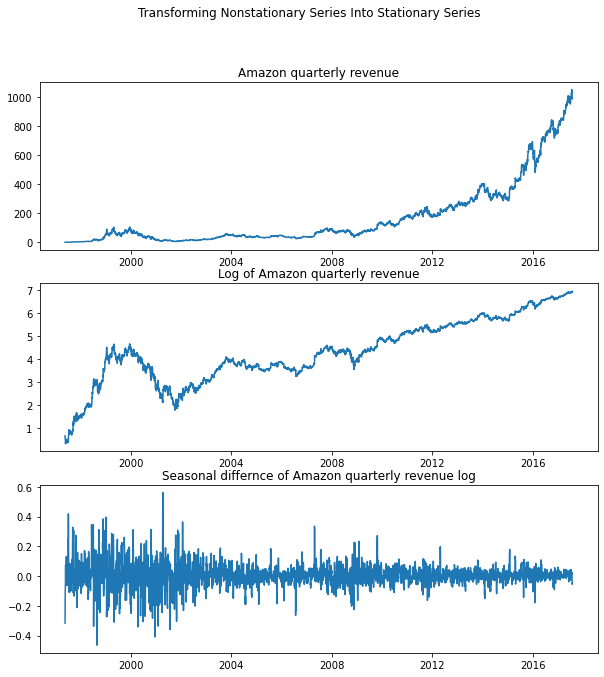

In [60]:
# Transforming Nonstationary Series Into Stationary Series
AMZN =  pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/AMZN.csv', parse_dates=['Date'], index_col='Date')

fig, axs = plt.subplots(3)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(AMZN)
axs[0].set_title('Amazon quarterly revenue')
axs[1].plot(np.log(AMZN))
axs[1].set_title('Log of Amazon quarterly revenue')

axs[2].plot(np.log(AMZN).diff(4))
axs[2].set_title('Seasonal differnce of Amazon quarterly revenue log')

## Autoregressive (AR) Models

An autoregressive (AR) model predicts future behavior based on past behavior. It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them.

In the AR model, today's value is equal to the fraction ($\phi$) of yesterday's value in addition to noise and the mean:

$R(t)=mean + \phi R(t-1) + noise$

Text(0.5, 1.0, 'Simulated data with Phi = -0.5')

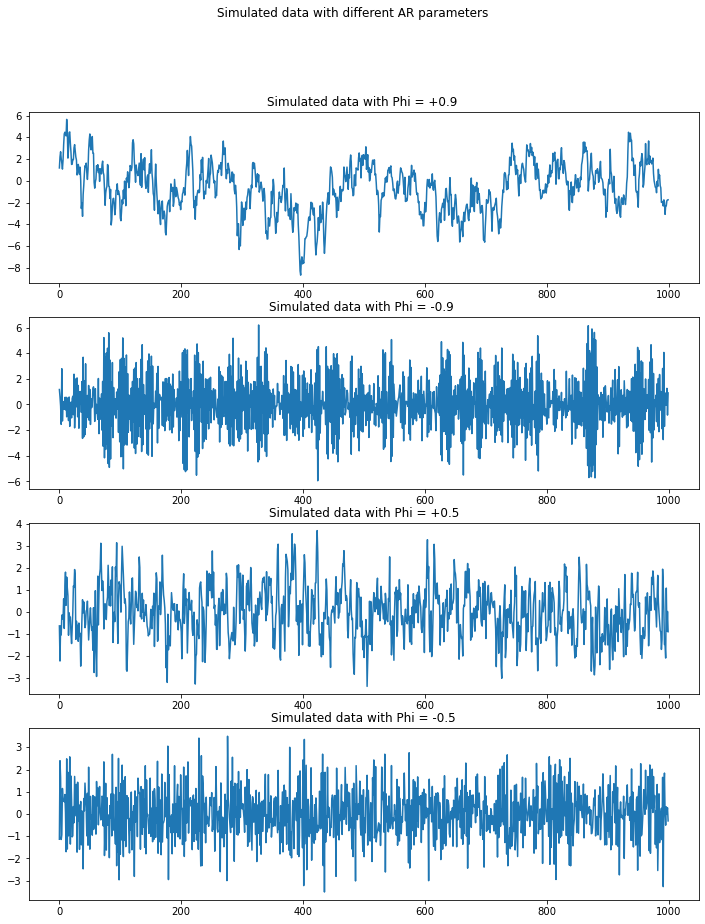

In [62]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

fig, axs = plt.subplots(4)
fig.set_size_inches(12, 14.5)
fig.suptitle('Simulated data with different AR parameters')

# Plot 1: AR parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
axs[0].plot(simulated_data_1)
axs[0].set_title('Simulated data with Phi = +0.9 ')

# Plot 2: AR parameter = -0.9
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
axs[1].plot(simulated_data_2)
axs[1].set_title('Simulated data with Phi = -0.9 ')


# Plot 3: AR parameter = +0.5
ar3 = np.array([1, -0.5])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
axs[2].plot(simulated_data_3)
axs[2].set_title('Simulated data with Phi = +0.5')


# Plot 3: AR parameter = -0.5
ar4 = np.array([1, 0.5])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
axs[3].plot(simulated_data_4)
axs[3].set_title('Simulated data with Phi = -0.5')


When phi is 0.9, it looks close to a random walk. When phi equals -0.9, the process has a large positive value is usually followed by a largely negative one. The bottom two are similar but are less exaggerated and closer to white noise.

To have better understanding let's look at the autocorrelation function of these four simulated time series:

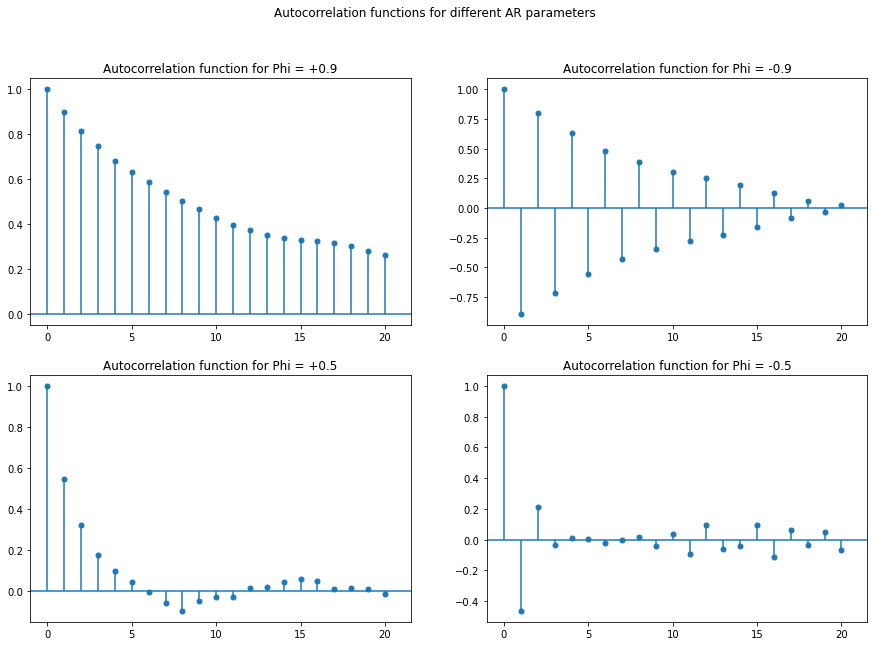

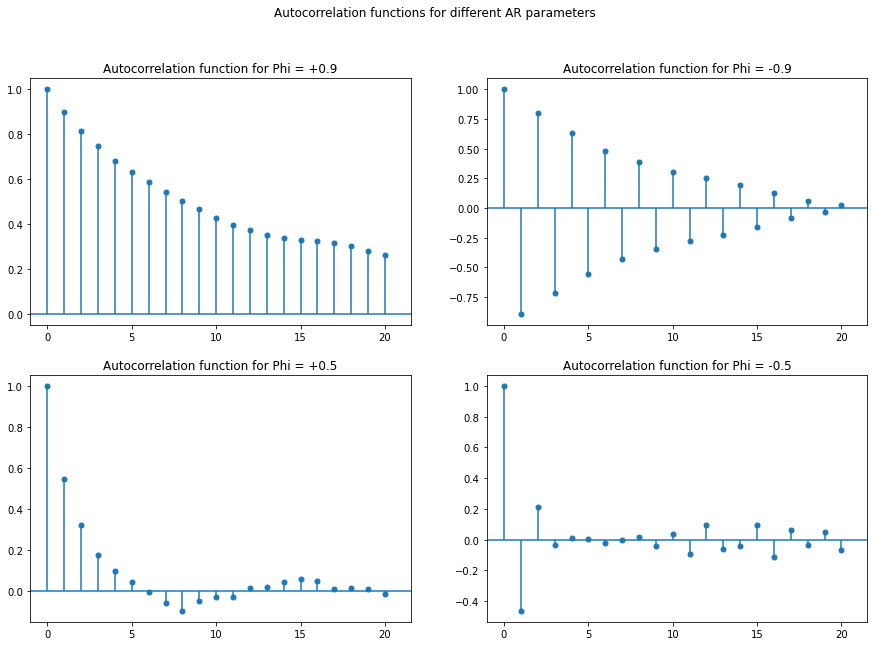

In [63]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Autocorrelation functions for different AR parameters')

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1 , alpha=1, lags=20, ax=axs[0,0], title='Autocorrelation function for Phi = +0.9')

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2 , alpha=1, lags=20, ax=axs[0,1], title='Autocorrelation function for Phi = -0.9')

# Plot 3: AR parameter = +0.5
plot_acf(simulated_data_3, alpha=1, lags=20,  ax=axs[1,0], title='Autocorrelation function for Phi = +0.5')

# Plot 4: AR parameter = -0.5
plot_acf(simulated_data_4, alpha=1, lags=20,  ax=axs[1,1], title='Autocorrelation function for Phi = -0.5')


If the phi is positive the autocorrelation function will decay exponentially at the rate of phi. This means that if phi is 0.9, then the autocorrelation at 1 is 0.9 and at 2 is (0.9)**2 and at 3 is (0.9)**3, and so on. If phi is negative then it will be the same but it will reverse its sign at each lag.

In [65]:

from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data_1, order=(1,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1397.818
Date:                Sun, 10 Jul 2022   AIC                           2801.636
Time:                        14:45:15   BIC                           2816.360
Sample:                             0   HQIC                          2807.232
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5922      0.304     -1.950      0.051      -1.187       0.003
ar.L1          0.8978      0.014     64.904      0.000       0.871       0.925
sigma2         0.9570      0.042     22.823      0.0

The order (1,0,0) means you’re fitting the data to an AR(1) model. An order (2,0,0) would mean you’re fitting the data to an AR(2) model. The second and third parts of the order will be discussed in the next section.

### Partial autocorrelation function (PACF)

The partial autocorrelation function (PACF) measures the incremental benefits of adding another lag. To have a better understanding of PACF let's first define the partial autocorrelation. A partial autocorrelation is a description of the relationship between an observation in a time series and data from earlier time steps that do not take into account the correlations between the intervening observations. The correlation between observations at successive time steps is a linear function of the indirect correlations. These indirect connections are eliminated using the partial autocorrelation function.

Based on this definition of partial autocorrelation, The PACF indicates only the association between two data that the shorter lags between those observations do not explain. The partial autocorrelation for lag 3 is, for example, merely the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between the two observations after the intermediate correlations have been removed.

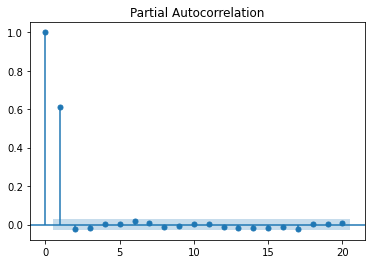

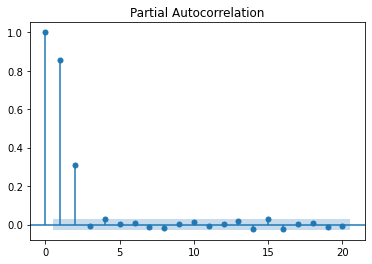

In [66]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

These plots show the Partial Autocorrelation Function for AR models of different orders. In the upper plot, for an AR(1) model, only the lag (1) PACF is significantly different from zero. Similarly, for an AR(2) model, two lags are different from zero.

If we applied the ARIMA function that we used in the previous subsection, to the simulated data used in the previous example and used the order of the model we got out of the PACF plot. We should get the same parameters from the function as the one used in generating the simulated data. In the example below we used the simulated data with AR(2) and phi of 0.6 and 0.3:

In [67]:
mod = ARIMA(simulated_data_2, order=(2,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7027.545
Date:                Sun, 10 Jul 2022   AIC                          14063.090
Time:                        14:55:21   BIC                          14089.158
Sample:                             0   HQIC                         14072.226
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.138      0.075      0.940      -0.260       0.281
ar.L1          0.5910      0.013     44.028      0.000       0.565       0.617
ar.L2          0.3078      0.013     23.087      0.0

The coefficients highlighted in yellow are phi_1 and phi_2, which are as expected 0.6 and 0.3.

### The Akaike Information Criterion (AIC)
The more parameters in a model, the better the model will fit the data. But this can lead the model to overfit the data. The information criteria adjust the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterion (AIC) and the Bayesian Information Criterion(BIC).

The AIC is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables. 

In practice, the way to use the information criteria is to fit several models, each with a different number of parameters, and choose the one with the lowest Bayesian information criterion. This is shown in the example below:

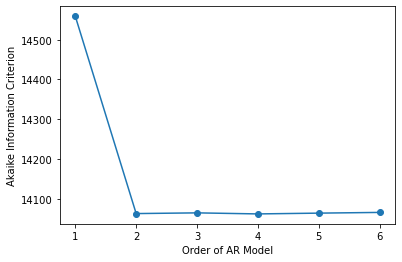

In [69]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    AIC[p] = res.aic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()

You can see that the lowest AIC occurs for an AR(2), which is what the simulated data was from.

### Moving Average and ARMA Models

In the MA model, today's values equal a mean plus noise, plus a fraction of theta of yesterday's noise. This is shown in the following equation:

$R(t)=mean + noise + \theta (yerterday noise)$

This is called an MA model of order 1, or simply an MA(1) model as we take into consideration only yesterday's noise, if we look for two previous days it will be MA(2), and so on. If the MA parameter, theta, is zero, then the process is white noise. MA models are stationary for all values of theta.

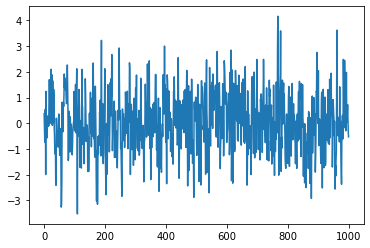

In [70]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [71]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data, order=(0,0,1))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1415.865
Date:                Sun, 10 Jul 2022   AIC                           2837.730
Time:                        15:21:59   BIC                           2852.453
Sample:                             0   HQIC                          2843.326
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0371      0.048      0.779      0.436      -0.056       0.130
ma.L1          0.5089      0.026     19.945      0.000       0.459       0.559
sigma2         0.9936      0.045     21.843      0.0

### ARMA models

An ARMA model is a combination of both the AR and MA models. In an autoregressive (AR) model, we regress the values of the time series against previous values of this same time series. The value of the time series at the time (t) is the value of the time series at the previous step multiplied with parameter a(1) added to a noise or shock term ϵ(t). The shock term is white noise, meaning each shock is random and not related to the other shocks in the series. a(1) is the autoregressive coefficient at lag one. Compare this to a simple linear regression where the dependent variable is y(t) and the independent variable is y(t-1). The coefficient a(1) is just the slope of the line and the shocks are the residuals of the line.

This is a first-order AR model. The order of the model is the number of time lags used. An order two AR model has two autoregressive coefficients and has two independent variables, the series at lag one and the series at lag two. More generally, we use p to mean the order of the AR model. This means we have p autoregressive coefficients and use p lags.

In a moving average (MA) model, we regress the values of the time series against the previous shock values of this same time series.

The value of the time series y(t)is m(1) times the value of the shock at the previous step; plus a shocking term for the current time step. This is a first-order MA model. Again, the order of the model means how many time lags we use. An MA two model would include shocks from one and two steps ago. More generally, we use q to mean the order of the MA model.

An ARMA model is a combination of the AR and MA models. The time series is regressed on the previous values and the previous shock terms. This is an ARMA-one-one model. More generally we use ARMA(p,q) to define an ARMA model. The p tells us the order of the autoregressive part of the model and the q tells us the order of the moving average part.

Here is the formula of the ARMA(1,1) model:

$R(t)=mean + \theta Noise (t-1) + \phi R(t-1) + noise$

Using the statsmodels package, we can both fit ARMA models and create ARMA data. Let’s take this ARMA-one-one model. Say we want to simulate data with these coefficients. First, we import the arma-generate-sample function. Then we make lists for the AR and MA coefficients. Note that both coefficient lists start with one. This is for the zero-lag term and we will always set this to one. We set the lag one AR coefficient as 0.5 and the MA coefficient as 0.2. We generate the data, passing in the coefficients, the number of data points to create, and the standard deviation of the shocks. Here, we actually pass in the negative of the AR coefficients we desire. This is a quirk we will need to remember.

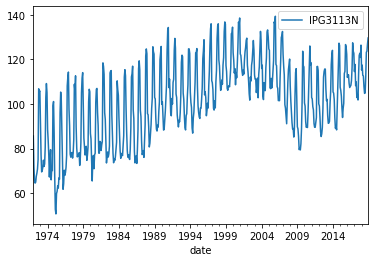

The p-value for the ADF test is  0.39243275007139455


In [97]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

#upload the data 
candy = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Arima%20Models%20in%20Python/candy_production.csv', parse_dates=['date'], index_col='date' )

# Convert the index to a datetime object
candy.index = pd.to_datetime(candy.index, format='%Y')

candy.dropna(axis=0, inplace=True)

# Plot average temperatures
candy.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(candy)
print("The p-value for the ADF test is ", result[1])

The p-value of the ADF test is 0.39, which means that the time series is not stationary and we cannot reject that it is a random walk. Therefore, we will need to transform the data into a stationary form before we can model it. We can think of this a bit like feature engineering in classic machine learning. One very common way to make a time series stationary is to take its difference. This is where from each value in our time series we subtract the previous value.

In [99]:
# Calculate the first difference and drop the nans
candy_diff = candy.diff()
candy_diff = candy_diff.dropna()

# Run test and print
result_diff = adfuller(candy_diff)
print(result_diff)

(-6.17591248975568, 6.631549159334751e-08, 13, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3091.3123583091397)


The results object is a tuple. The zeroth element is the test statistic, in this case, it is -6.17. The more negative this number is, the more likely that the data is stationary. The next item in the results tuple is the test p-value. Here it’s 6.6e-08. If the p-value is smaller than 0.05, we reject the null hypothesis and assume our time series must be stationary. The last item in the tuple is a dictionary. This stores the critical values of the test statistic which equate to different p-values. In this case, if we wanted a p-value of 0.05 or below, our test statistic needed to be below -2.86.

From the results, we can see that now the time series are stationary. This time, taking the difference was enough to make it stationary, but for other time series, we may need to make the difference more than once or do other transformations. Sometimes we will need to perform other transformations to make the time series stationary. This could be to take the log, or the square root of a time series, or to calculate the proportional change. It can be hard to decide which of these to do, but often the simplest solution is the best one.

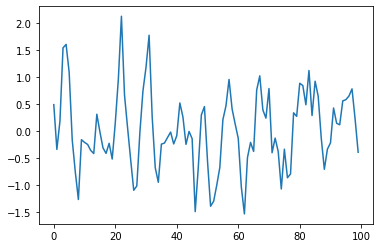

In [101]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar_coefs = [1, -0.5] 
ma_coefs = [1, 0.2]
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)
plt.plot(y);

The generated data can be represented with this equation:

$y(t)=0.5y(t-1)+0.2\epsilon(t-1) +\epsilon (t)$

### Fitting time series models

We had a quick look at fitting time series models in the last section but let’s have a closer look. To fit these models we first import the ARIMA model class from the statsmodels package. We create a model object and define the model order, we must also feed in the training data. The data can be a pandas dataframe, a pandas series, or a NumPy array. Remember that the order for an ARIMA model is (p,d,q) p is the autoregressive lags, d is the order of the difference, and q is the moving average lags. d is always an integer, while p and q may either be integers or lists of integers. To fit an AR model we can simply use the ARMA class with q equal to zero. To fit an MA model, we set p equal to zero.

In [102]:
from statsmodels.tsa.arima.model import ARIMA
# Instantiate model object
model = ARIMA(y, order=(1,0,1))
# Fit model
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -81.246
Date:                Sun, 10 Jul 2022   AIC                            170.492
Time:                        16:28:58   BIC                            180.912
Sample:                             0   HQIC                           174.709
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.127      0.173      0.863      -0.228       0.272
ar.L1          0.3943      0.138      2.855      0.004       0.124       0.665
ma.L1          0.4026      0.151      2.672      0.0

Here we fitted an ARIMA(1,0,1) model, so the model has AR-lag-1 and lag-1 coefficients. In the table, these are the ar.L1 and ma.L1 rows. The lag-1 MA coefficient is in the last row. The first column shows the model coefficients whilst the second column shows the standard error in these coefficients. This is the uncertainty on the fitted coefficient values.

After introducing how to fit ARIMA models to data, let’s see how to use them to forecast and predict the future. let’s take an example of time series represented by an AR(1) model. At any time point in the time series, we can predict the next values by multiplying the previous value with the lag-one AR coefficient. If the previous value was 15 and coefficient a-one is 0.5, we would estimate the next value is 7.5. If the shock term had a standard deviation of 1, we would predict our lower and upper uncertainty limits to be 6.5 and 8.5. This type of prediction is called one-step-ahead prediction. Below is its equation:

$y=0.5*15+\epsilon (t)$

If the time series you are trying to forecast is non-stationary, you will not be able to apply the ARMA model to it. We first have to make the difference to make it stationary and then we can use the ARMA model for it. However, when we do this, we will have a model which is trained to predict the value of the difference of the time series. What we really want to predict is not the difference, but the actual value of the time series. We can achieve this by carefully transforming our prediction of the differences.

We start with predictions of the difference values The opposite of taking the difference is taking the cumulative sum or integral. We will need to use this transform to go from predictions of the difference values to predictions of the absolute values.

We can do this using the np.cumsum function. If we apply this function we now have a prediction of how much the time series changed from its initial value over the forecast period. To get an absolute value we need to add the last value of the original time series to this.

These steps of starting with non-stationary data; differencing to make it stationary; and then integrating the forecast are very common in time series modeling. This is a lot of work! But thankfully, there is an extension of the ARMA model which does it for us! This is the autoregressive integrated moving average model (ARIMA).

We can implement an ARIMA model using the SARIMAX model class from statsmodels. The ARIMA model has three model orders. These are p the autoregressive order; d the order of differencing, and q the moving average order. In the previous section, we were setting the middle order parameter d to zero. If d is zero we simply have an ARMA model.

When we use this model, we pass it in a non-differenced time series and the model order. When we want to difference the time series data just once and then apply an ARMA(2,1) model. This is achieved by using an ARIMA(2,1,1) model. After we have stated the difference parameter we don’t need to worry about differencing anymore. We fit the model as before and make forecasts. The differencing and integration steps are all taken care of by the model object. This is a much easier way to get a forecast for non-stationary time series!

### Using ACF and PACF to find the best model parameters

In the previous section, we knew how to use the ARIMA model for forecasting, however, we did not discuss how to choose the order of the forecasting model. The model order is a very important parameter that affects the quality of the forecasts. One of the best ways to identify the correct model order is the autocorrelation function (ACF) and partial autocorrelation function (PACF).

The ACF can be defined as the correlation between a time series and itself with n lags. So ACF(1) is the correlation between the time series and a one-step lagged version of itself. An ACF(2) is the correlation between the time series and a one-step lagged version of itself and so on. To have a better understanding of the ACF, let’s plot it for the earthquake time series for ten lags.

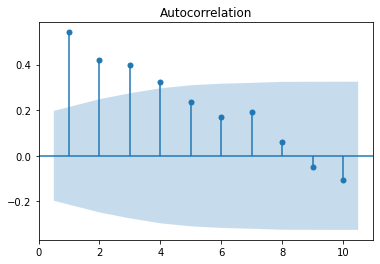

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

earthquake = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Arima%20Models%20in%20Python/earthquakes.csv', parse_dates=['date'], index_col='date' )

# Make ACF plot
plot_acf(earthquake['earthquakes_per_year'], lags=10, zero=False)
plt.show()

The bars in the figure above show the correlation of the time series with itself at each lag. If the bar is inside the blue shaded region, this means that it is not statistically significant.

On the other hand, the PACF is the correlation between a time series and a lagged version of itself after subtracting the effect of correlation at smaller lags. So it can be considered as the correlation at a particular lag. To have a better understanding of the PACF, let’s plot it for the earthquake time series for ten lags.

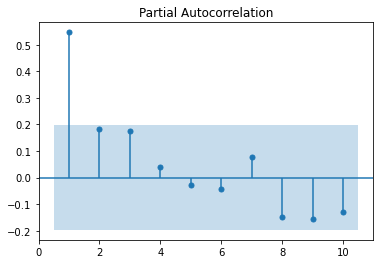

In [105]:
# Make PACF plot
plot_pacf(earthquake['earthquakes_per_year'], lags=10, zero=False)
plt.show()

The bars in the figure above show the correlation of the time series with itself at each lag after subtracting the effect of the correlation of the smaller lags. If the bar is inside the blue shaded region, this means that it is not statistically significant.

The time series must be made stationary before making these plots. If the ACF values are high and tail off very very slowly, therefore this is a sign that the data is non-stationarity, and it needs to be different. On the other hand, if the autocorrelation at lag-1 is very negative this is a sign that we have taken the difference too many times.

By comparing the ACF and PACF for a time series, we can indicate the model order.

In [106]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(earthquake['earthquakes_per_year'], order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))            
        except:
            print(p, q, None, None)
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\minicon

Sorted by AIC 


   p  q         aic         bic
0  1  1  647.132300  654.917660
1  1  2  648.738566  659.119046
2  2  1  648.842840  659.223319
3  2  2  648.850644  661.826244
4  2  0  656.028374  663.813734
5  1  0  666.645526  671.835765
6  0  2  761.067479  768.852838
7  0  1  799.674173  804.864412
8  0  0  888.429772  891.024892
Sorted by BIC 


   p  q         aic         bic
0  1  1  647.132300  654.917660
1  1  2  648.738566  659.119046
2  2  1  648.842840  659.223319
3  2  2  648.850644  661.826244
4  2  0  656.028374  663.813734
5  1  0  666.645526  671.835765
6  0  2  761.067479  768.852838
7  0  1  799.674173  804.864412
8  0  0  888.429772  891.024892


The results show that the best model to fit the data is (1,1), which is different from what was found using the PACF/ACF.

The next step is to diagnose the model to know whether the model is behaving well or not. To diagnose the model we will focus on the residuals of the training data. The residuals are the difference between the model’s one-step-ahead predictions and the real values of the time series.

In statsmodels, the residuals over the training period can be accessed using the dot-resid attribute of the results object. The results are stored as a pandas series. This is shown in the code below:

In [107]:
# The model with the best p and q found from pervious step
model = sm.tsa.statespace.SARIMAX(earthquake['earthquakes_per_year'], order=(1, 0, 1))
# Fit model
results = model.fit()
# Assign residuals to variable
residuals = results.resid
print(residuals)

date
1900-01-01    13.000000
1901-01-01     1.857276
1902-01-01    -5.045721
1903-01-01    -0.527074
1904-01-01     5.821641
                ...    
1994-01-01    -0.589256
1995-01-01     9.835545
1996-01-01     2.694023
1997-01-01    -0.278098
1998-01-01    -3.939243
Length: 99, dtype: float64


c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


To know how far the predictions are from the true value, we can calculate the mean absolute error of the residuals. This is shown in the code below:

In [108]:
# The mean absolute error
mae = np.mean(np.abs(residuals))
print(mae)

4.755625668265318


The ideal model should have residuals that are uncorrelated white Gaussian noise centered on zero. We can use the results object’s .plot_diagnostics method to generate four common plots for evaluating this. The code for this is shown below:

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


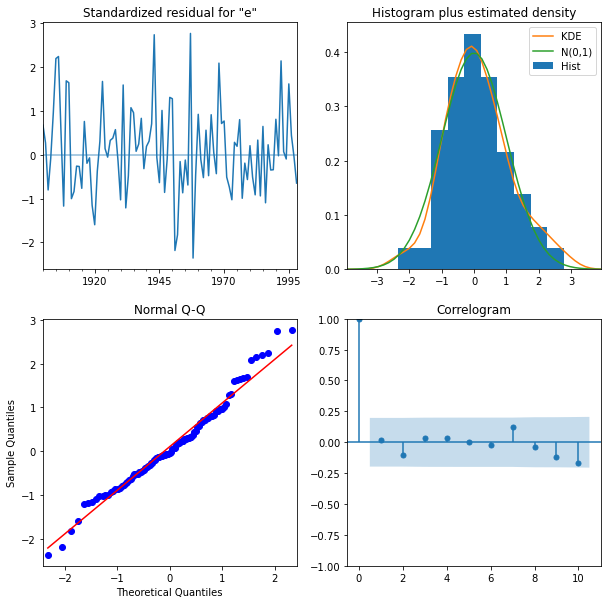

In [109]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(10,10))
plt.show()

There are four plots in the residuals diagnostic plots:

* Standardized residuals plot: The top left plot shows one-step-ahead standardized residuals. If our model is working correctly, there should be no obvious pattern in the residuals. This is shown here in this case.
* Histogram plus estimated density plot: This plot shows the distribution of the residuals. The histogram shows us the measured distribution; the orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing well.
* Normal Q-Q plot: The Q-Q plot compare the distribution of the residuals to the normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end.
* Correlogram plot: The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag greater than zero should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model.

We can get the summary statistics of the model residuals using the results .summary method. In the result table shown below, the Prob(Q) is the p-value associated with the null hypothesis that the residuals have no correlation structure. Prob(JB) is the p-value associated with the null hypothesis that the residuals are Gaussian normally distributed. If either of the p-values is less than 0.05 we reject that hypothesis.

In [110]:
# Summary statistics
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -320.566
Date:                  Sun, 10 Jul 2022   AIC                            647.132
Time:                          16:50:33   BIC                            654.918
Sample:                      01-01-1900   HQIC                           650.282
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.014     70.282      0.000       0.962       1.017
ma.L1         -0.5517      0.089     -6.198      0.000      -0.726      -0.377
sigma2        37.0254      4.980    

The values of Prob(Q) and Prob(JB) are both more than 0.05, so we cannot reject the null hypothesis that the residuals are Gaussian normally distributed.

## Seasonal ARIMA Models
A seasonal time series has predictable patterns that repeat regularly. Although we call this feature seasonality, it can repeat after any length of time. These seasonal cycles might repeat every year like sales of suncream, every week like the number of visitors to a park, or every day like the number of users on a website at any hour.

Any time series can be thought of to be made of three main components: trend, seasonal component, and the residual. The figure below shows the three components of the candy production time series used before.

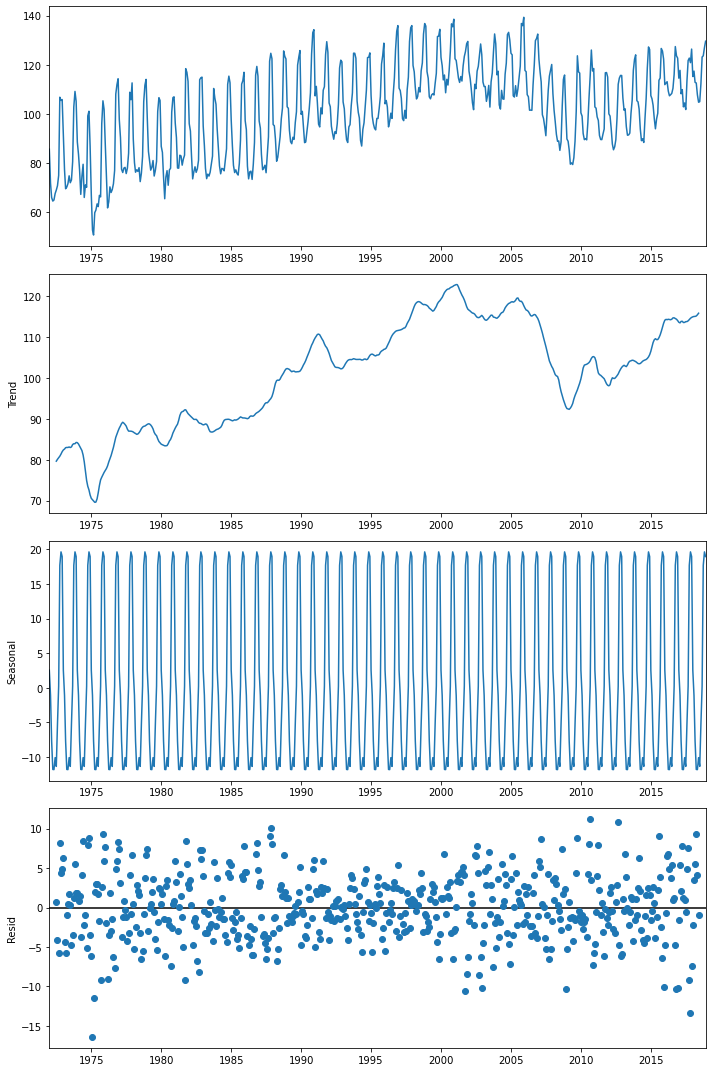

In [111]:
# Import
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose data
decomp_results = seasonal_decompose(candy, period=12)

# Plot decomposed data
plt.rcParams["figure.figsize"] = (10,15)
decomp_results.plot()
plt.show()

From the figure above it is obvious that there is a seasonality in the data. The cycle here is 12 months. However, this was given as a parameter to the function. If we would like to find the cycle or the seasonality cycle, one method is to use the ACF and observe the lag after which the correlation pattern gets repeated. However, it is important to make sure that the data is stationary. Since the candy production data is not stationary as it contains trends, we can transform it into stationary by taking the first difference. However, this time we are only trying to find the period of the time series, and the ACF plot will be clearer if we just subtract the rolling mean. We calculate the rolling mean using the DataFrame’s .rolling method where we pass the window size and also use the .mean method. Any large window size, N, will work for this. We subtract this from the original time series and drop the NA values. The time series is now stationary and it will be easier to interpret the ACF plot.

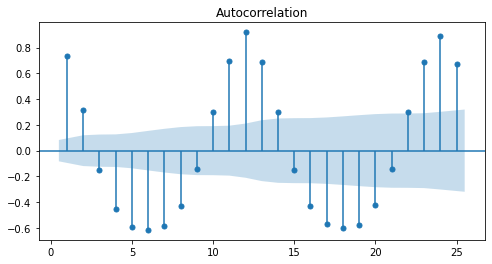

In [112]:
# Subtract long rolling average over 5 steps
candy = candy - candy.rolling(5).mean()
# Drop NaN values
candy = candy.dropna()

# Identifying seasonal data using ACF

# Create figure
fig, ax = plt.subplots(1,1, figsize=(8,4))
# Plot ACF
plot_acf(candy.dropna(), ax=ax, lags=25, zero=False)
plt.show()

After plotting the ACF of the detrended data, we can clearly see that there is a seasonal period of 12 steps. Since the data is seasonal we will always have correlated residuals left if we try to fit an ARIMA model to it. This means that we aren’t using all of the information in the data, and so we aren’t making the best predictions possible. This will be solved by using the seasonal Arima as will be shown in the next subsection.

The seasonal ARIMA (SARIMA) is used for this. Fitting a SARIMA model is like fitting two different ARIMA models at once, one to the seasonal part and another to the non-seasonal part. Since we have these two models we will have two sets of orders. We have non-seasonal orders for the autoregressive (p), the difference (d), and moving average (q) parts. We also have this set of orders for the non-seasonal part added to them a new order, S, which is the length of the seasonal cycle.

Let’s compare the SARIMA and ARIMA models further. Below is the equation of the ARIMA model with parameters (2,0,1). In this equation, we regress the time series against itself at lags-1 and 2 and against the shock at lag-1.

ARIMA(2,0,1) model :

$y(t)=a(1) y(t-1) + a(2) y(t-2) + m(1) \epsilon (t-1) + \epsilon (t)$

Below is the equation for a simple SARIMA model with a season length of 7 days. This SARIMA model only has a seasonal part; we have set the non-seasonal orders to zero. We regress the time series against itself at lags of one season and two seasons and against the shock at a lag of one season.

SARIMA(0,0,0)(2,0,1)7 model:

$y(t)=a(7) y(t-7) + a(14) y(t-14) + m(7) \epsilon (t-7) + \epsilon (t)$

This particular SARIMA model will be able to capture seasonal, weekly patterns, but won’t be able to capture local, day-to-day patterns. If we construct a SARIMA model and include non-seasonal orders as well, then we can capture both of these patterns.

Fitting a SARIMA model is almost the same as fitting an ARIMA model. We import the model object and fit it as before. The only difference is that we have to specify the seasonal order as well as the regular order when we instantiate the model.


In [115]:
model = sm.tsa.statespace.SARIMAX(df, order=(p,d,q), seasonal_order=(P,D,Q,S))

NameError: name 'd' is not defined

To make a time series stationary we may need to apply seasonal differencing. In seasonal differencing, instead of subtracting the most recent time series value, we subtract the time series value from one cycle ago. We can take the seasonal difference by using the df.diff method. This time we pass in an integer S, the length of the seasonal cycle.

If the time series shows a trend then we take the normal difference. Once we have found the two orders of differencing and made the time series stationary, we need to find the other model orders. To find the non-seasonal orders (p,q), we plot the ACF and the PACF of the differenced time series. To find the seasonal orders (P, Q) we plot the ACF and PACF of the differenced time series at multiple seasonal steps. Then we can use the same table of ACF and PACF rules to work out the seasonal order. We make these seasonal ACF and PACF plots using the plot_acf and plot_pacf functions, but this time we set the lags parameter to a list of lags instead of a maximum. This plots the ACF and PACF at these specific lags only.

Let’s apply this to the candy production time series used in the previous subsection. We know that the seasonal period of the data is 12 steps. So first we will take the seasonal difference to remove the seasonal effect and then one step difference to remove the trend effect.

<AxesSubplot:xlabel='date'>

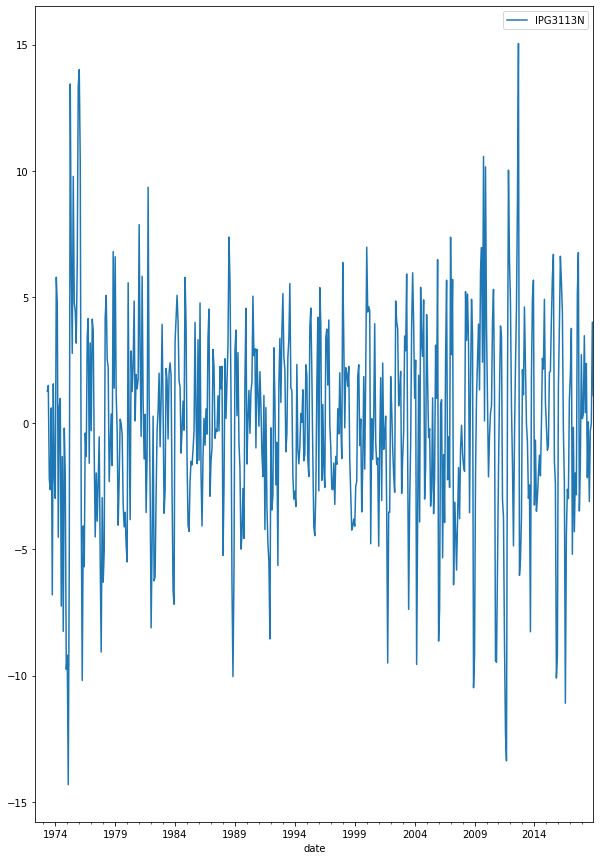

In [116]:
# Seasonal differencing
S = 12
candy_diff = candy.diff(S)
candy_diff.plot()

<AxesSubplot:xlabel='date'>

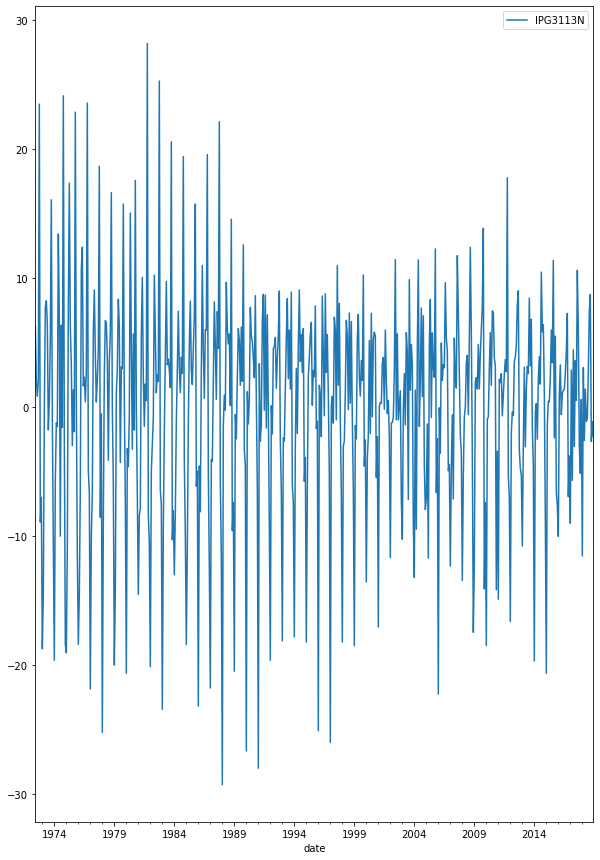

In [117]:
# one step differencing
candy_diff = candy.diff()
candy_diff = candy_diff.dropna()
candy_diff.plot()

In [118]:
# Run Dicky-Fuller test
result = adfuller(candy_diff)

# Print test statistic
print('The test stastics:', result[0])

# Print p-value
print("The p-value:",result[1])

The test stastics: -12.53499931105421
The p-value: 2.3824843186253056e-23


The p-value is less than 0.05 so we can reject the null hypothesis and assume that the time series now is stationary. After that, we will plot the ACF and PACF to find the non-seasonal model parameters.

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


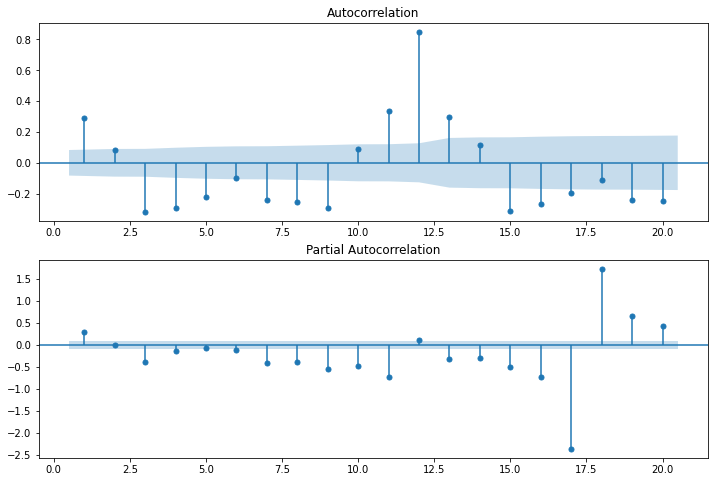

In [119]:
# find the non-seasonal model prameters 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(candy_diff, lags=20, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(candy_diff, lags=20, zero=False, ax=ax2)

plt.show()

There is no clear pattern in the ACF and PACF plots, so we will use the AIC and BIC to narrow down our choices.

In [120]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-4
for p in range(5):
    # Loop over q values from 0-4
    for q in range(5):
      
        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(candy_diff, order=(p, 1, q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))            
        except:
            print(p, q, None, None)
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Models sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Models sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospat

Models sorted by AIC 


    p  q          aic          bic
0   4  3  3616.106473  3650.701344
1   3  2  3669.531708  3695.477862
2   4  2  3801.828237  3832.098750
3   3  4  3811.629849  3846.224721
4   4  4  3830.775338  3869.694568
5   4  1  3836.359678  3862.305832
6   1  4  3838.202461  3864.148615
7   3  1  3843.158669  3864.780464
8   2  2  3848.681856  3870.303651
9   2  3  3855.519606  3881.465760
10  2  4  3857.078077  3887.348590
11  3  3  3857.351939  3887.622452
12  0  4  3883.980432  3905.602227
13  0  3  3885.227752  3902.525188
14  1  3  3886.133313  3907.755108
15  2  1  3924.270087  3941.567523
16  1  2  3924.271147  3941.568583
17  0  2  3932.088768  3945.061845
18  0  1  3971.275823  3979.924541
19  4  0  3995.534321  4017.156116
20  3  0  4040.512949  4057.810385
21  1  1  4082.301476  4095.274553
22  1  0  4083.194351  4091.843069
23  2  0  4085.058093  4098.031170
24  0  0  4155.261709  4159.586068
Models sorted by BIC 


    p  q          aic          bic
0   4  

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The best model parameters are (0,3). After that, we will plot the seasonal ACF and PACF to find the seasonal parameters.

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


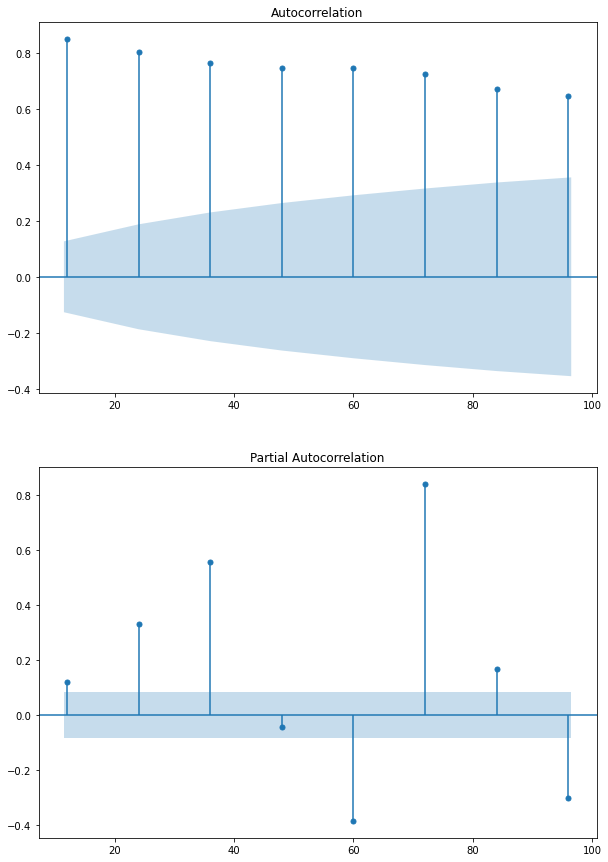

In [121]:
# Plotting seasonal ACF and PACF

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)

# Plot seasonal ACF
plot_acf(candy_diff, lags=[12,24,36,48,60,72, 84, 96 ], ax=ax1)

# Plot seasonal PACF
plot_pacf(candy_diff, lags=[12,24,36,48,60,72, 84, 96], ax=ax2)
plt.show()

The ACF is tailing off and the PACF is cut off after a lag of three. So the model parameter is (0,3). The final step is to fit the model with all of these parameters.

In [122]:
# Fitting a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate model
S = 12
D = 1
d = 1
P = 0
Q = 3
p = 4
q = 3
model = SARIMAX(candy, order=(p,d,q), seasonal_order=(P,D,Q,S))

# Fit model
results = model.fit()

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fortunately, there is a package that will do most of this work for us. This is the pmdarima package The auto_arima function from this package loops over model orders to find the best one. The object returned by the function is the results object of the best model found by the search. This object is almost exactly like a statsmodels SARIMAX results object and has the summary and the plot-diagnostics method.

In [123]:
# Searching over model orders
import pmdarima as pm

results = pm.auto_arima(candy)
print(results)
print(results.summary())
results.plot_diagnostics()

ModuleNotFoundError: No module named 'pmdarima'

The order of the best model found by the search is (2,3). However, it did not take the seasonal components into consideration. To do this we have to set the seasonal parameter to true. We also need to specify the length of the seasonal period; and the order of seasonal differencing. Finally, we will use a few non-order parameters. Using information_criterion you can select whether to choose the best model based on AIC or BIC, if information_criterion =’aic’ it will select it based on AIC and if it is information_criterion= ‘bic’ it will select it based on BIC. Also, we will set the trace parameter to true then this function prints the AIC and BIC for each model it fits. To ignore bad models we will set the error_action= ‘ignore’. We will set the stepwise to true then instead of searching over all of the model orders, the function searches outwards from the initial model order guess using an intelligent search method. This might save running time and computation power.

In [ ]:
# Seasonal search parameters

results = pm.auto_arima(candy, # data
                        seasonal=True, # is the time series seasonal
                        m=12, # the seasonal period
                        D=1, # seasonal difference order
                        start_P=1, # initial guess for P
                        start_Q=1, # initial guess for Q
                        max_P=4, # max value of P to test
                        max_Q=4, # max value of Q to test
                        information_criterion='aic', # used to select best model
                        trace=True, # print results whilst training
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True,
                       )
print(results)
print(results.summary())
results.plot_diagnostics()

### LSTM

Long Short Term Memory or LSTM is a type of Neural Network, which was developed on the basis provided by the Recurrent Neural Networks, or RNN. The algorithms main usage falls into NLPs or Time Series, and the main idea behind it relates to processing the information they receive from the previous neuron and applying the activation function from scratch (as the CNN/RNN do), they actually divide the neuron into three main parts from which to set up the input from the next layer of neurons: Learn, Unlearn and Retain gate. The structure of the LSTM layer can be visualized in the image below:

![LSTM](https://miro.medium.com/max/700/0*RkFisWmsLWtGCByq.png)

#### Parameters for the LSTM
* PERCENTAGE = .98 #Split train/val and test set
* CALLBACK = .031 #Used to stop training the Network when the MAE from the validation set reached a perormance below 3.1%
* BATCH_SIZE = 20 #Number of samples that will be propagated through the network. I chose almost a trading month
* EPOCH = 50 #Settled to train the model
* WINDOW_LSTM = 30 #The window used for the input data
* PREDICTION_SCOPE = 0 #How many period to predict, being 0=1

## Time series clustering

In [38]:
time_series_data = pd.read_csv('G:/My Drive/CATEDRA/MACHINE LEARNING/MachineLearning/data/temperature.csv', parse_dates=['datetime'], index_col='datetime')
city_data = pd.read_csv('G:/My Drive/CATEDRA/MACHINE LEARNING/MachineLearning/data/city_attributes.csv')
cities_list = city_data.City.tolist()
ts = time_series_data.dropna().reset_index()
ts['datetime'] = pd.to_datetime(ts['datetime'])
ts.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
1,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
3,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
4,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5


### Normalized

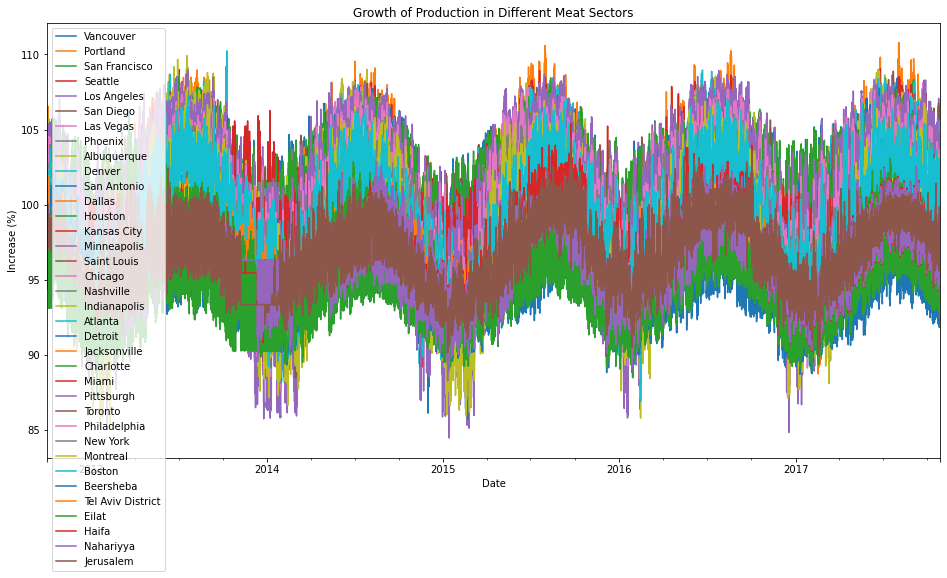

In [69]:
tsh=ts.set_index("datetime").asfreq("1h")
normalized = tsh.div(tsh.iloc[0]).mul(100)  # Multiply by 100 to get percentages

normalized.plot(figsize=(16, 8), 
    title="Growth of Production in Different Meat Sectors")
plt.xlabel("Date")
plt.ylabel("Increase (%)");

### Correlation

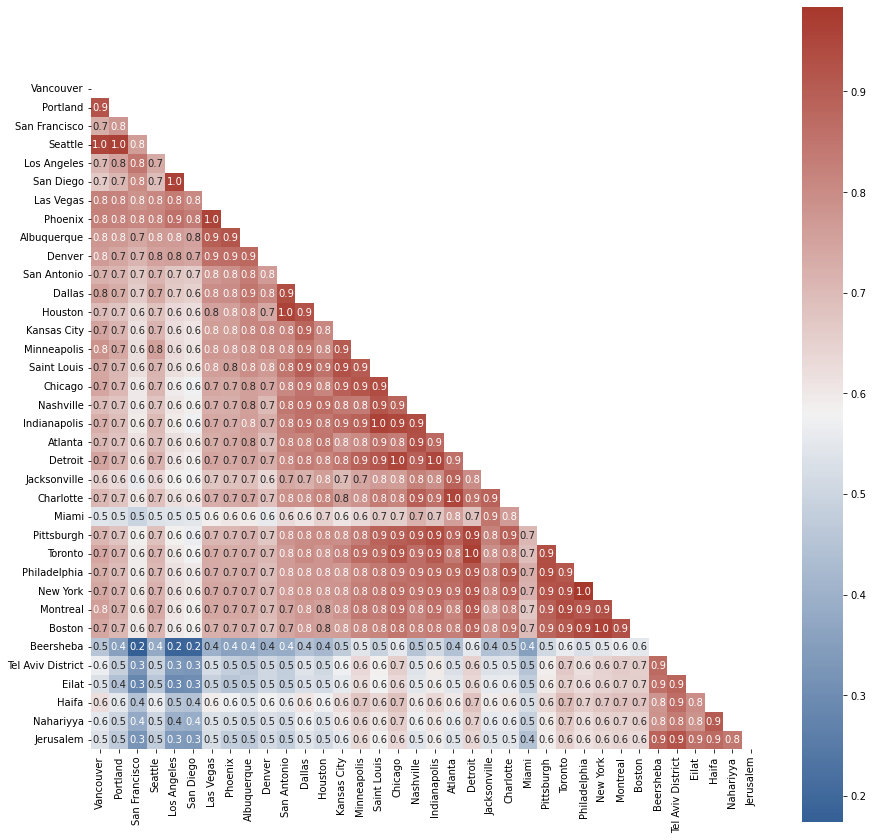

In [74]:

# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = tsh.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".1f", ax=ax)
plt.show();

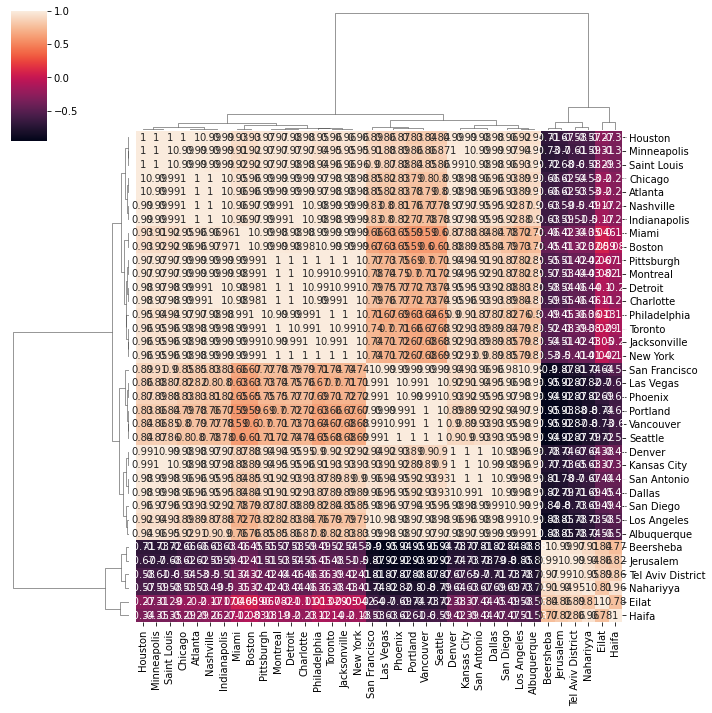

In [87]:
seasonality_dict = {
    ts: seasonal_decompose(tsh[ts].dropna(), period=24).seasonal for ts in tsh.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()
sns.clustermap(seasonality_corr, annot=True)
plt.show();

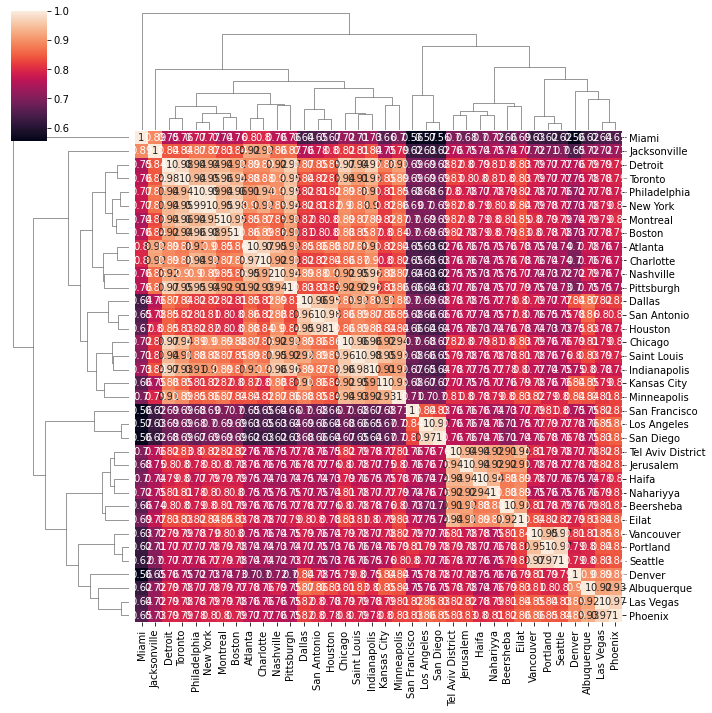

In [89]:
trend_dict = {
    ts: seasonal_decompose(tsh[ts].dropna(), period=24).trend for ts in tsh.columns
}

# Compute corr matrix
trend_corr = pd.DataFrame(trend_dict).corr()
sns.clustermap(trend_corr, annot=True)
plt.show();

In [53]:

seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(tsh[ts].dropna()).seasonal for ts in tsh.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show();

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

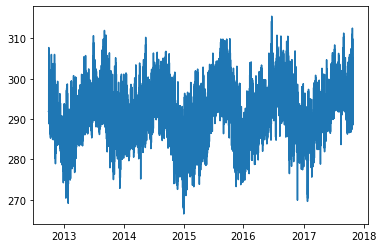

In [18]:
cities_list = time_series_data.columns.tolist()[1:]
plt.plot(ts['datetime'],ts[cities_list[4]])

The time series are of course too messy for the algorithm we are using: it would take ages. Let’s undersample the dataset for our purpose:

In [31]:
undersample_data = ts.loc[np.linspace(ts.index.min(),ts.index.max(),1500).astype(int)]
undersample_data = undersample_data.reset_index().drop('index',axis=1)

Text(0, 0.5, 'Temperature')

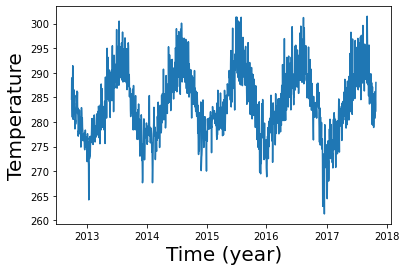

In [32]:
plt.plot(undersample_data.datetime,undersample_data['Vancouver'])
plt.xlabel('Time (year)',fontsize=20)
plt.ylabel('Temperature',fontsize=20)

In [180]:
from tslearn import metrics
data_array = np.array(undersample_data.T.drop('datetime').values)
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data_array)
cities_list = undersample_data.T.drop('datetime').index.tolist()

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [181]:
y=model.predict(data_array)

c:\Users\usuario\miniconda3\envs\geospatial\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 36 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


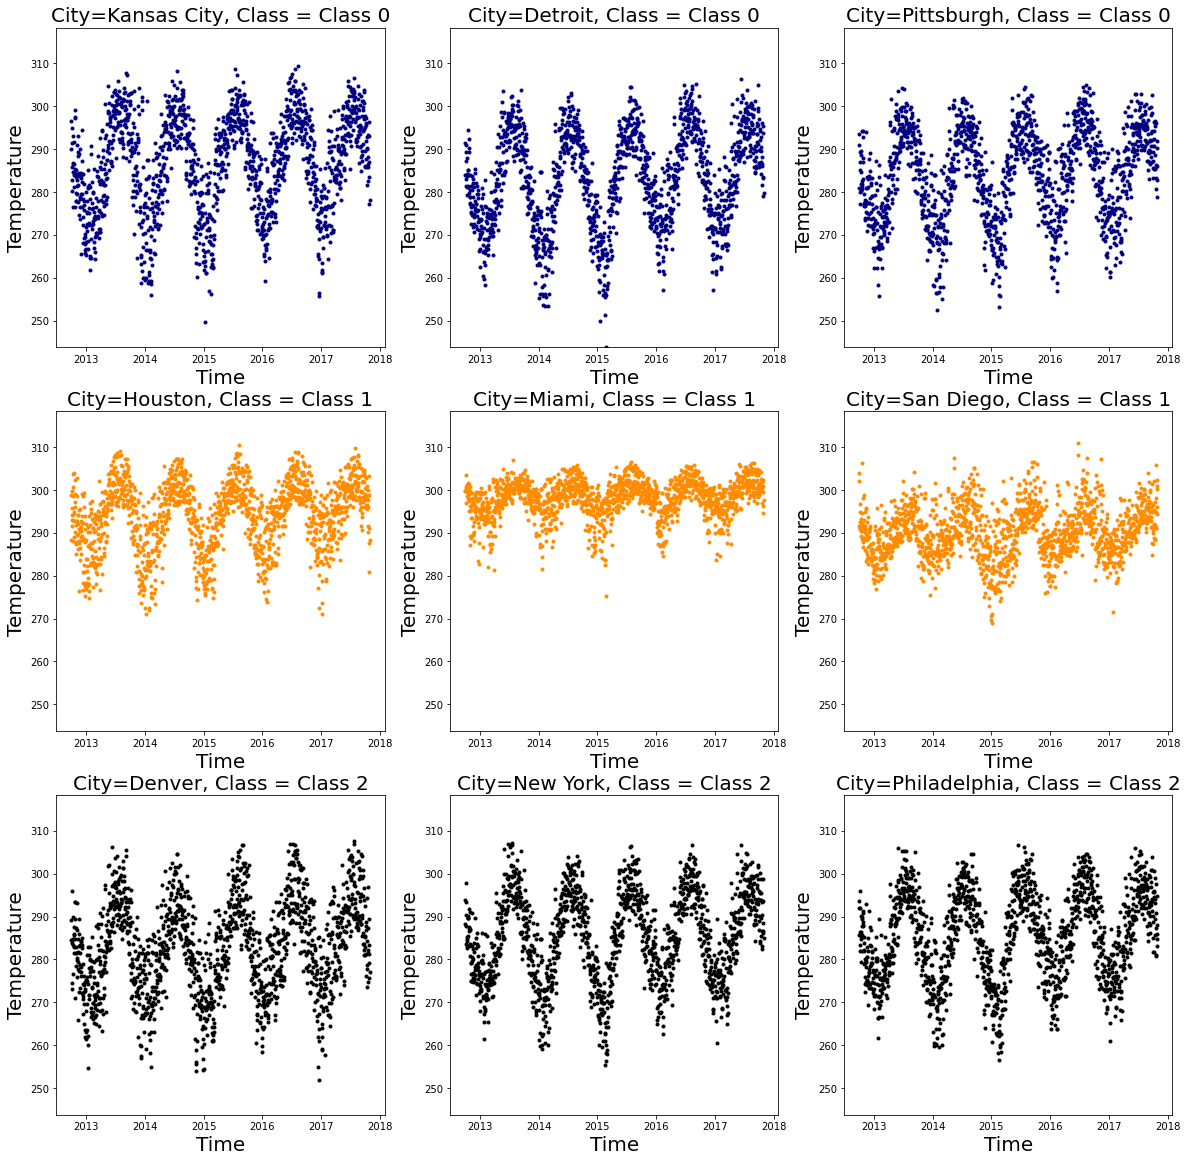

In [184]:
x = undersample_data.datetime
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('Temperature',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('City=%s, Class = %s'%(cities_list[k],Names[j-1]),fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

* The first class has a wide range, but it seems to be always smaller or equal than 310. The lowest value seems to be, in general, around 260 (values around 250 seems to be outliers).
* The second class has shorter range but apparently larger value: both the lower and the larger value is larger than the correspondent ones of the first class
* The third class happens to be similar to the first one, but we have more values in the high temperature than what we have in the small temperature.

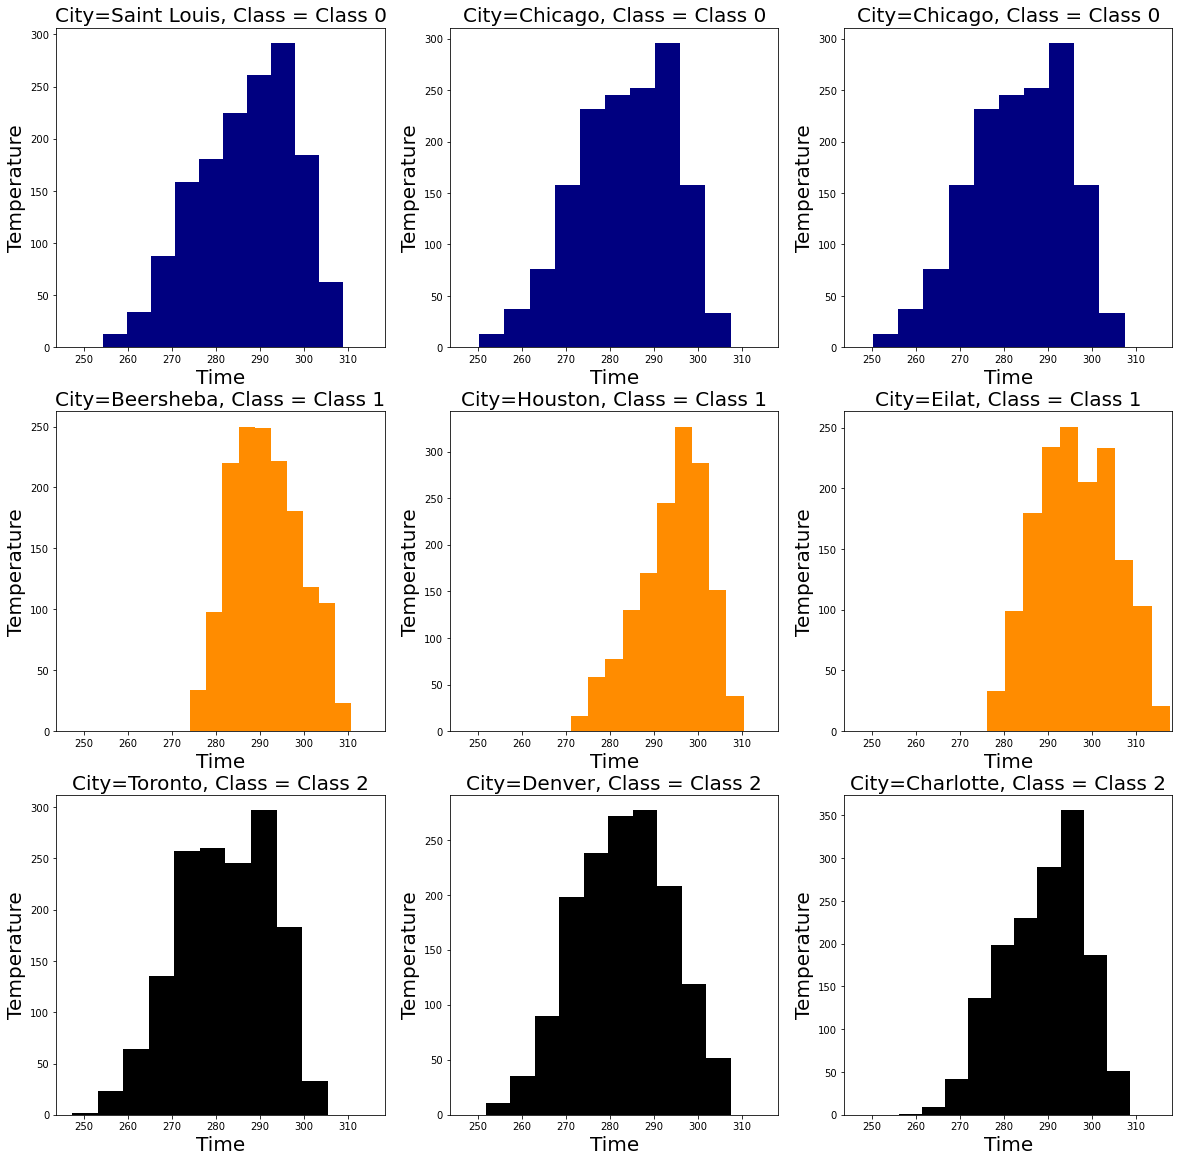

In [185]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.hist(data_array[k],color=colors[j-1])
    plt.ylabel('Temperature',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('City=%s, Class = %s'%(cities_list[k],Names[j-1]),fontsize=20)
    plt.xlim(data_array.min(),data_array.max())

Why do we say that this is informative and not obvious? Well, because the cities appear to be similar in terms of trends and ranges but not really close in terms of location.
On the other hand, if you just do a K Means on the locations (like this):

In [186]:
naive_data = city_data[['Latitude','Longitude']].reset_index().drop('index',axis=1)
from sklearn.cluster import KMeans
naive_k = KMeans(n_clusters=3).fit(X=naive_data).predict(naive_data)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

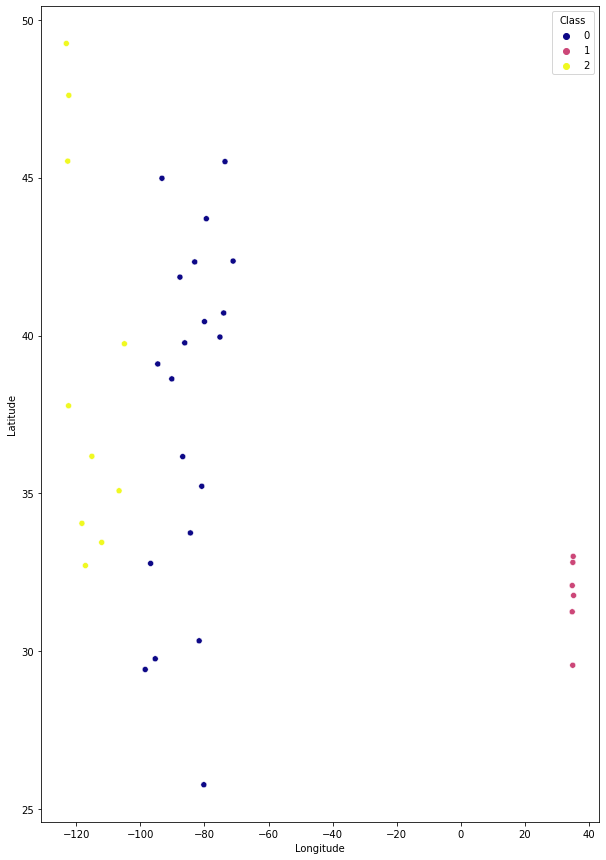

In [188]:
import seaborn as sns
data_c = naive_data.copy()
data_c['Class']=naive_k
sns.scatterplot(x='Longitude',y='Latitude',hue='Class',data=data_c,palette='plasma')